<a href="https://colab.research.google.com/github/the-sulav/crop_yield/blob/main/Crpo_yield_linear_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from google.colab import files

#WITHOUT GRADIENT DESCENT

In [ ]:
data = pd.read_csv("Crop_Production_Statistics.csv")

FileNotFoundError: ignored

In [ ]:
data.shape

In [ ]:
data.head()

In [ ]:
# for scatter plot choose your features
y_axis = "State"

plt.scatter(data["Yield"],data[y_axis])
plt.xlabel("Yield")
plt.ylabel(y_axis)
plt.show()

In [ ]:
# select your feature to find number of unique data
unique = data["District "].nunique()
print(unique)

In [ ]:
#finding missing value in each column
for feature in data.columns:
  missing_value = data[feature].isnull().sum()
  print(f"No of missing values in {feature} : {missing_value}")

In [ ]:
dfa = data.copy()

In [ ]:
dfa.loc[11]

In [ ]:
dfa.shape

In [ ]:
a=0
for i in range(dfa.shape[0]):

  if(a<4948): #there are 4948 missing values in Production
    is_null = pd.isnull(data.loc[i,"Production"])
    if is_null == True:
      dfa.drop(i,inplace =True)
      a+=1
dfa.reset_index(drop=True, inplace=True)

In [ ]:
print(f'No of datas dropped for Production: {a}')

In [ ]:
dfa.shape

In [ ]:
#finding missing value in each column
for feature in dfa.columns:
  missing_value = dfa[feature].isnull().sum()
  print(f"No of missing values in {feature} : {missing_value}")

In [ ]:
dfa.shape

In [ ]:
a=0
for i in range(dfa.shape[0]):
  if(a<5):# there are 5 missing values in Crop so
    is_null = pd.isnull(dfa.loc[i,"Crop"])
    if is_null == True:
      dfa.drop(i,inplace =True)
      a+=1
dfa.reset_index(drop=True, inplace=True)

In [ ]:
dfa.loc[273744]

State           30.0
District       137.0
Crop             3.0
Crop_Year     2004.0
Season           1.0
Area            50.0
Production     160.0
Yield            3.2
Name: 273744, dtype: float64

In [ ]:
print(f'No of datas dropped for Crop: {a}')

No of datas dropped for Crop: 0


In [ ]:
#finding missing value in each column
for feature in dfa.columns:
  missing_value = dfa[feature].isnull().sum()
  print(f"No of missing values in {feature} : {missing_value}")

No of missing values in State : 0
No of missing values in District  : 0
No of missing values in Crop : 0
No of missing values in Crop_Year : 0
No of missing values in Season : 0
No of missing values in Area  : 0
No of missing values in Production : 0
No of missing values in Yield : 0


In [ ]:
dfa.to_csv('Missing_value_removed_crop_production_statistics.csv', index=False)
files.download('Missing_value_removed_crop_production_statistics.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# DOWNLOADED AND RE-UPLODED

In [ ]:
dfa = pd.read_csv("Missing_value_removed_crop_production_statistics.csv")

In [ ]:
dfa.head()

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Kharif,2439.6,3415.0,1.40
1,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Rabi,1626.4,2277.0,1.40
2,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Autumn,4147.0,3060.0,0.74
3,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Summer,4147.0,2660.0,0.64
4,Andaman and Nicobar Island,NICOBARS,Arecanut,2009,Autumn,4153.0,3120.0,0.75


In [ ]:
dfa.shape

(295285, 8)

In [ ]:
#all unique values in each feature column
for feature in dfa.columns:
  if feature not in ["Crop_Year","Production","Yield","Area "]:
    unique = dfa[feature].unique()
    print(feature)
    print(sorted(unique))

State
['Andaman and Nicobar Island', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'CHANDIGARH', 'Chhattisgarh', 'Dadra and Nagar Haveli', 'Daman and Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Laddak', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'THE DADRA AND NAGAR HAVELI', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh']
District 
['ADILABAD', 'AGAR MALWA', 'AGRA', 'AHMADABAD', 'AHMEDNAGAR', 'AIZAWL', 'AJMER', 'AKOLA', 'ALAPPUZHA', 'ALIGARH', 'ALIRAJPUR', 'ALLAHABAD', 'ALMORA', 'ALWAR', 'AMBALA', 'AMBEDKAR NAGAR', 'AMETHI', 'AMRAVATI', 'AMRELI', 'AMRITSAR', 'AMROHA', 'ANAND', 'ANANTAPUR', 'ANANTNAG', 'ANJAW', 'ANUGUL', 'ANUPPUR', 'ARARIA', 'ARAVALLI', 'ARIYALUR', 'ARWAL', 'ASHOKNAGAR', 'AURAIYA', 'AURANGABAD', 'AZAMGARH', 'BADGAM', 'BAGALKOTE', 'BAGESHWAR', 'BAGHPAT', 'BAHRAICH', 'BAKSA', 'BALAGHAT

In [ ]:
#finding missing value in each column
for feature in dfa.columns:
  missing_value = dfa[feature].isnull().sum()
  print(f"No of missing values in {feature} : {missing_value}")

No of missing values in State : 0
No of missing values in District  : 0
No of missing values in Crop : 0
No of missing values in Crop_Year : 0
No of missing values in Season : 0
No of missing values in Area  : 0
No of missing values in Production : 0
No of missing values in Yield : 0


In [ ]:
label_encode = LabelEncoder()
dfa["State"] = label_encode.fit_transform(dfa["State"])


dfa["District "] = label_encode.fit_transform(dfa["District "])

dfa["Season"] = label_encode.fit_transform(dfa["Season"])

dfa["Crop"] = label_encode.fit_transform(dfa["Crop"])

# POLYNOMIAL REGRESSION
*italicised text*

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X = dfa[["Production"]]
Y = dfa["Yield"]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,random_state = 24)

In [ ]:
X = dfa[["State","District ","Season","Crop","Crop_Year","Production","Area "]]
Y = dfa["Yield"]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,random_state = 24)

In [ ]:
degree = 2
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly_features.fit_transform(x_train)
X_test_poly = poly_features.transform(x_test)

ValueError: ignored

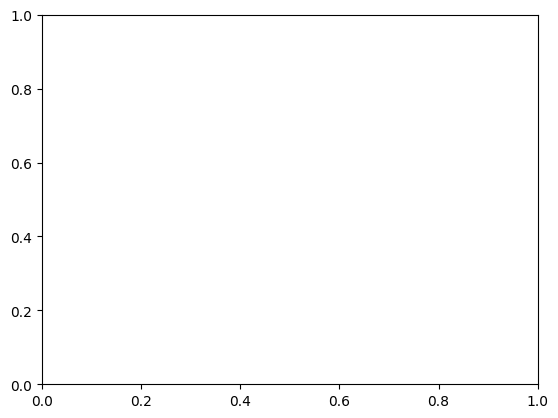

In [ ]:
plt.scatter(x_train,y_train)
plt.xlabel("x_train")
plt.ylabel("y_train")
plt.show()

In [ ]:
plt.scatter(x_train, X_train_poly[:, 0], label='X_train_poly vs X_train', color='blue')
plt.xlabel('X_train')
plt.ylabel('X_train_poly (Feature 1)')
plt.legend()
plt.show()

# USING MULTIPLE LINEAR REGRESSION

In [ ]:
# correlation between each feature and Yield

for feature in dfa.columns:
  correlation = dfa[feature].corr(dfa["Yield"])
  print(f'correlation between Yield and {feature}: {correlation}')

*italicised text*## USING ALL FEATURES WITHOUT CARING ABOUT CORRELATION


In [ ]:
X = dfa[["State","District ","Season","Crop","Crop_Year","Production","Area "]]
Y = dfa["Yield"]

In [ ]:
print(X.shape)
print(Y.shape)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,random_state = 24)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train,y_train)

In [ ]:
y_predict = model.predict(x_test)

In [ ]:
mse = mean_squared_error(y_test,y_predict)
r2 = r2_score(y_test,y_predict)

In [ ]:
print(f"mse: {mse}")
print(f"r2: {r2}")

## OMITTING FEATURE WITH VERY LOW CORRELATION



In [ ]:
X = dfa[["Season","Crop","Production"]]
Y = dfa["Yield"]

In [ ]:
print(X_a.shape)
print(Y_a.shape)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X_a,Y_a,test_size=0.1,random_state = 24)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train,y_train)

In [ ]:
y_predict = model.predict(x_test)

In [ ]:
mse = mean_squared_error(y_test,y_predict)
r2 = r2_score(y_test,y_predict)

In [ ]:
print(f"mse: {mse}")
print(f"r2: {r2}")

In [ ]:
mse: 685308.1173455606
r2: 0.2273950328588208

## TRYING ALL POSSIBLE VALUES FOR MULTIOLE LINEAR REGRESSION


In [ ]:
from itertools import combinations

def generate_combinations(elements, r):
    # Use combinations from itertools to generate all combinations of length r
    return [list(combination) for combination in combinations(elements, r)]

def generate_nested_combinations(elements):
    nested_combinations = []

    # Iterate over all possible lengths of combinations
    for r in range(1, len(elements) + 1):
        # Extend the list of combinations with those of length r
        nested_combinations.extend(generate_combinations(elements, r))

    return nested_combinations

elements = ["State","District ","Season","Crop","Crop_Year","Production","Area "]
result = generate_nested_combinations(elements)
print(result)


In [ ]:
def model_finder(X,Y):
  x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,random_state = 24)
  model = LinearRegression()
  model.fit(x_train,y_train)
  y_predict = model.predict(x_test)
  mse = mean_squared_error(y_test,y_predict)
  r2 = r2_score(y_test,y_predict)
  return mse,r2

In [ ]:
error_dict={ }
Y_tr = dfa["Yield"]
for index_list in result:
  print(index_list)
  X_tr = pd.DataFrame()
  for index in index_list:
    X_tr[index] = dfa[index]
  mse,r2 = model_finder(X_tr,Y_tr)
  error_list = [mse,r2]
  error_dict[tuple(index_list)] = error_list

In [ ]:
print(error_dict)

In [ ]:
min_tuple = min(error_dict, key=lambda key: error_dict[key][0])

# Accessing the minimum value and the corresponding tuple
min_value = error_dict[min_tuple][0]

print("Minimum value of the mse element:", min_value)
print("Tuple corresponding to the minimum value:", min_tuple)

In [ ]:
max_tuple = max(error_dict, key=lambda key: error_dict[key][1])

# Accessing the minimum value and the corresponding tuple
max_value = error_dict[max_tuple][0]

print("Maximum value of the r2 element:", max_value)
print("Tuple corresponding to the minimum value:", max_tuple)

# TRYING SGD

In [ ]:
X = dfa[["State","District ","Season","Crop","Crop_Year","Production","Area "]]
Y = dfa["Yield"]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state = 24)

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [ ]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [ ]:
model = SGDRegressor(max_iter = 10000,learning_rate = "constant",eta0 = 0.00001, tol = 0.001)

In [ ]:
model.fit(x_train_trans,y_train)
y_pred = model.predict(x_test_trans)

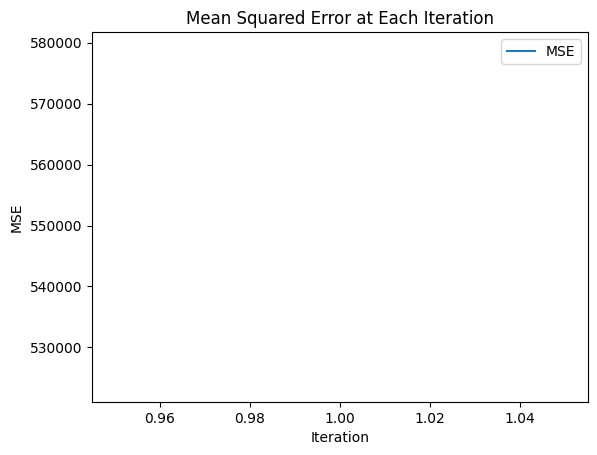

In [ ]:
mse_values = []

for iteration in range(1, 2):
    model.partial_fit(x_train, y_train.ravel())

    # Predict on the training set
    y_pred = model.predict(x_train)

    # Calculate MSE and store it
    current_mse = mean_squared_error(y_train, y_pred)
    mse_values.append(current_mse)

    # Optionally, you can print or store other metrics of interest during training

# Print or plot MSE at each iteration
plt.plot(range(1, 2), mse_values, label='MSE')
plt.title('Mean Squared Error at Each Iteration')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.legend()
plt.show()


In [ ]:
mse = mean_squared_error(y_test,predict)
r2 = r2_score(y_test,predict)
print(f"mse is {mse}")
print(f"r2 score is {r2}")

mse is 552779.3336204588
r2 score is 0.27393587076946735


In [ ]:
#learning rate = 0.001

mse is 574283.6785728729
r2 score is 0.24569036204126327


In [ ]:
print(f"mse is {mse}")
print(f"r2 score is {r2}")

# SGD WITH POLINOMIAL REGRESSION